# Small Assignment 1 Solutions

## Part 1. 
We are going to explore the nuts and bolts of regressions by doing one by hand. *Whether you are using* **R** *or excel, please do not use canned functions to calculate sample variances and covaraiances and to estimate regression coefficients.*

Start by reading in the `energy.csv` file.

In [1]:
#Read in the data 
df <-read.csv('energy.csv', header=T)

**(a)** Create two new variables, GDP (\$) per capita and energy use (KT oil equivalent) per capita. *Hint: use the* `mutate` *function.*


In [2]:
#Load tidyverse
library(tidyverse)
#Generate per capita variables
df <- mutate(df, gdp_pc= gdp/pop, energy_pc=energy_use/pop)
#head(df)

Warning message:
"As of rlang 0.4.0, dplyr must be at least version 0.8.0.
* dplyr 0.7.8 is too old for rlang 0.4.5.
* Please update dplyr to the latest version.
* Updating packages on Windows requires precautions:
  <https://github.com/jennybc/what-they-forgot/issues/62>"
-- Attaching packages --------------------------------------- tidyverse 1.2.1 --

v ggplot2 3.1.0     v purrr   0.2.5
v tibble  2.0.1     v dplyr   0.7.8
v tidyr   0.8.2     v stringr 1.3.1
v readr   1.3.1     v forcats 0.3.0

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Warning message:
"The `printer` argument is deprecated as of rlang 0.3.0.
This warning is displayed once per session."


**(b)** Generate a scatter plot comparing energy use per capita (on the y-axis) to GDP per capita (on the x-axis) for the countries in your sample. *Hint: Use the* `plot` *function.*

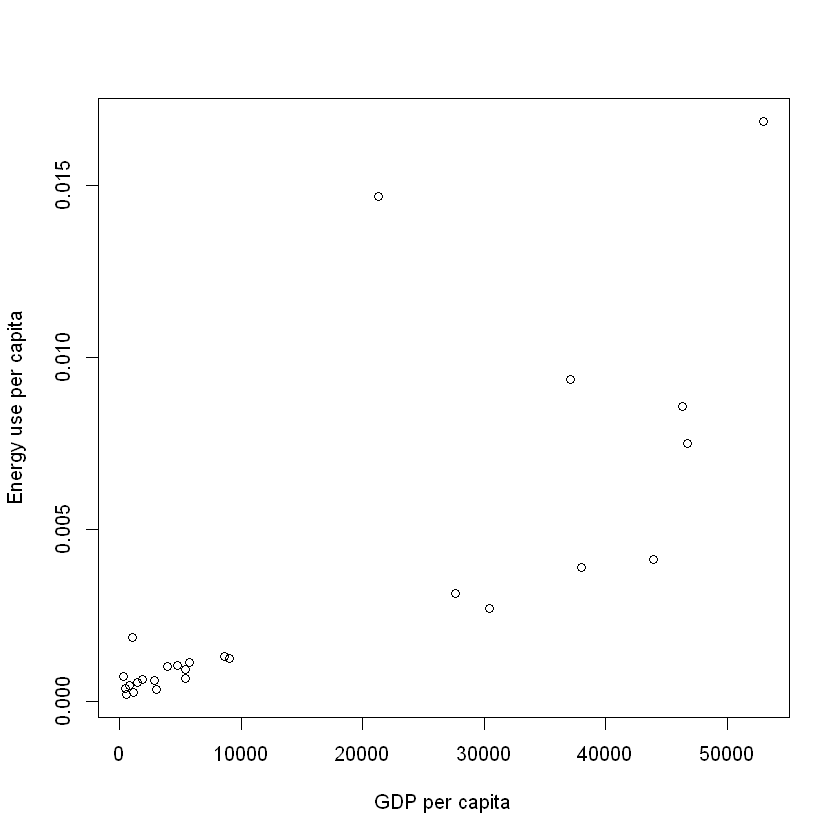

In [3]:
#Simple scatterplot
plot(df$gdp_pc, df$energy_pc, xlab='GDP per capita', ylab='Energy use per capita')

**(c)** Calculate the sample mean of GDP per capita, sample mean of energy per capita,
covariance of GDP per capita and energy use per capita, and variance of GDP per
capita.

In [4]:
#Get means
xbar <-mean(df$gdp_pc)
ybar <-mean(df$energy_pc)


#Create new columns with residuals (x_i-\bar{x}) and (y_i-\bar{y}) as part of df 
df <- mutate(df, xres= gdp_pc-xbar, yres= energy_pc-ybar) 
#Create new columns with _i*y_i and x_i^2
df <- mutate(df, xy= xres*yres, xx=xres^2)

#Get covariance and variance by summing up xy and xx and dividing by n-1. 
covxy<- sum(df$xy)/(nrow(df)-1)
varx<- sum(df$xx)/(nrow(df)-1)

#Display results
c(xbar, ybar, covxy, varx) #note the use of c to create a vector!

[1] 1.541927e+04 3.231658e-03 6.227203e+01 3.265780e+08

**(d)** Suppose $y_i$ is energy use per capita in country $i$ and $x_i$ is GDP per capita in country $i$. Suppose your statistical model is $$y_i=\beta_0+\beta_1x_i+u_i.$$ Estimate $\hat{\beta}_0$ and $\hat{\beta}_1$ using your results in part **(c)**. 

In [5]:
#Solve for \hat\beta_1 and \hat\beta_0
b1hat<- covxy/varx
b0hat<- ybar-xbar*b1hat
#Display
c(b0hat,b1hat)

[1] 2.915054e-04 1.906804e-07

**(e)** Plot a line which indicates the predictions from your estimated model, $$\hat{y}_i=\hat{\beta}_0+\hat{\beta}_1x_i.$$ *Hint: use the* `curve` *function.*

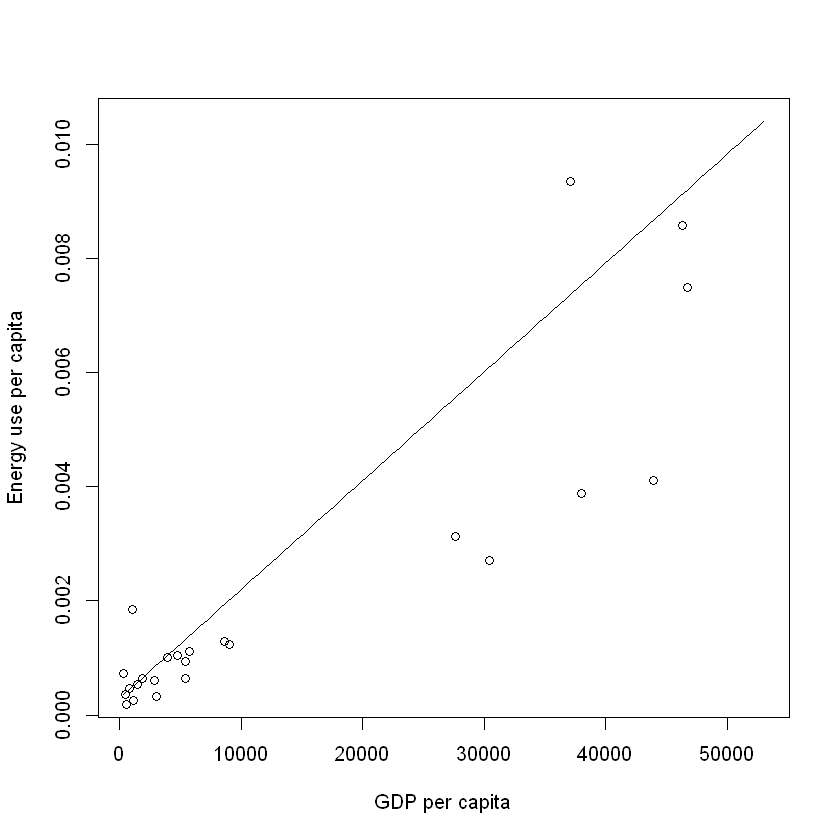

In [6]:
#plot the line
curve(b0hat+b1hat*x, min(df$gdp_pc), max(df$gdp_pc), xlab='GDP per capita', ylab = 'Energy use per capita')
#overlay with data points
points(df$gdp_pc,df$energy_pc)

**(f)** Interpret your estimates $\hat{\beta}_0$ and $\hat{\beta}_1$.

$\hat\beta_0=$0.00003 means that the model predicts that a country with 0 GDP would have energy use equivalent to .0003 KT of oil. $\hat\beta_1=$1.9e-07 means that model predicts that each additional dollar of GDP leads to 1.9e-07 addition KT of oil equivalent energy use. 

## Part 2.
Suppose you estimate a weekly wage equation which suggests 

$$ \log(wage_i)=5.45+.09*Ed_i+u_i$$ 

where $Ed_i$ is the number of years of education completed by person $i$. 

**(a)** Predict the wage for a person with 12 years of education (that is a person who completes high school).

In [7]:
exp(5.45+.09*12)

[1] 685.3982

**(b)** Interpret your estimated $\beta_1=$0.09.

An additional year of education is associated with 9% higher weekly wages. 